In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
pulled_layoffs_data = layoffs_df
pulled_layoffs_data.head()

NameError: name 'layoffs_df' is not defined

In [5]:
# pie chart the job loosers layoff vs not on layoff - DONE
# unemployment rise = rise in reentrants and new entrants to labor force - DONE
# check to see if there is any fluxuation in quitting

In [4]:
layoffrecessionyears = pulled_layoffs_data['years'].unique()
layoffmonthnumber = [ ]

for year in layoffrecessionyears:
    layoffmonth = 13
    while (layoffmonth > 1): 
        layoffmonth = layoffmonth -1
        layoffmonthnumber.append(layoffmonth)
        if  layoffmonth == 0:
            break
pulled_layoffs_data['Month #'] = layoffmonthnumber

NameError: name 'pulled_layoffs_data' is not defined

In [13]:
layoffdates = []

for index, row in pulled_layoffs_data.iterrows():
    layoffdatenumber = str(f"{row['years']}-{row['Month #']}")
    layoffdates.append(layoffdatenumber)

pulled_layoffs_data['Date'] = layoffdates

In [23]:
pulled_layoffs_data = pulled_layoffs_data.rename(columns={'years': 'Year', 'months': 'Month', 'Unemployment level, 16yo and over, thousands': 'Overall Unemployment',
                                     'Job losers, 16yo and over, thousands': 'Loss of Job Total', 'Job losers on layoff, 16yo and over, thousands': 'Loss of Job: On Layoff',
                                     'Job losers not on layoff, 16yo and over, thousands': 'Loss of Job: Not on Layoff', "Job leavers (quit), 16yo and over, thousands": "Number of Persons Quitting",
                                     'Reentrants to labor force, 16yo and over, thousands': 'Reentrants to Labor Force', 'New entrants to labor force, 16yo and over, thousands': 'New Entrants to Labor Force'})

In [60]:
pulled_layoffs_data = pulled_layoffs_data[['Year', 'Month', 'Month #', 'Date', 'Overall Unemployment', 'Loss of Job Total', 'Loss of Job: on Layoff', 'Loss of Job: Not on Layoff', 
                      'Number of Persons Quitting', 'Reentrants to Labor Force', 'New Entrants to Labor Force']]

recession_layoffs = pulled_layoffs_data[pulled_layoffs_data['Year']<=2011]
recession_layoffs.head()

,Year,Month,Month #,Date,Overall Unemployment,Loss of Job Total,Loss of Job: on Layoff,Loss of Job: Not on Layoff,Number of Persons Quitting,Reentrants to Labor Force,New Entrants to Labor Force
84,2011,December,12,2011-12,13093,7555,1238,6317,952,3359,1282
85,2011,November,11,2011-11,13302,7651,1180,6471,1011,3357,1277
86,2011,October,10,2011-10,13594,7891,1247,6644,1086,3370,1287
87,2011,September,9,2011-9,13948,8027,1203,6824,973,3470,1378
88,2011,August,8,2011-8,13818,8009,1181,6829,979,3520,1254


In [40]:
onlayoff = recession_layoffs['Loss of Job: on Layoff'].sum()
offlayoff = recession_layoffs['Loss of Job: Not on Layoff'].sum()

layofflabels = ['On Layoff', 'Not on Layoff'] 
layoffsplit = [onlayoff, offlayoff]
layoffcolors = ['orange', 'lightskyblue']

In [3]:
plt.figure(figsize=(10, 10))
plt.pie(layoffsplit, labels=layofflabels, colors=layoffcolors,
        autopct="%1.1f%%", startangle=180)
plt.title("Job Loss % On Layoff vs. Not on Layoff (2008 - 2011)")
plt.setp(autopcts, **{'weight':'bold', 'fontsize':12.5})
plt.show()

NameError: name 'layoffsplit' is not defined

<Figure size 720x720 with 0 Axes>

In [ ]:
# Add to plots notebook

In [125]:
newworkforce = pulled_layoffs_data[['Year', 'Month', 'Month #', 'Date', 'Overall Unemployment', 'Reentrants to Labor Force', 'New Entrants to Labor Force']]
newworkforce = newworkforce.reindex(index=newworkforce.index[::-1])

newworkforce = newworkforce.reset_index()
del newworkforce['index']

newworkforce.head(10)

,Year,Month,Month #,Date,Overall Unemployment,Reentrants to Labor Force,New Entrants to Labor Force
0,2008,January,1,2008-1,7685,2203,677
1,2008,February,2,2008-2,7497,2129,656
2,2008,March,3,2008-3,7822,2121,704
3,2008,April,4,2008-4,7637,2119,625
4,2008,May,5,2008-5,8395,2493,797
5,2008,June,6,2008-6,8575,2533,786
6,2008,July,7,2008-7,8937,2662,835
7,2008,August,8,2008-8,9438,2655,821
8,2008,September,9,2008-9,9494,2599,815
9,2008,October,10,2008-10,10074,2623,819


In [124]:
changewf_df_data = newworkforce[['Overall Unemployment', 'Reentrants to Labor Force', 'New Entrants to Labor Force']]
changewf_df_date = newworkforce['Date']
changewf_norm = (changewf_df_data - changewf_df_data.mean()) / (changewf_df_data.max() - changewf_df_data.min())
changewf_norm['Date'] = changewf_df_date
changewf_norm = changewf_norm[['Date', 'Overall Unemployment', 'Reentrants to Labor Force', 'New Entrants to Labor Force']]
changewf_norm.head(10)

,Date,Overall Unemployment,Reentrants to Labor Force,New Entrants to Labor Force
0,2008-1,-0.669921,-0.561605,-0.529521
1,2008-2,-0.693855,-0.606372,-0.557409
2,2008-3,-0.652480,-0.611212,-0.493664
3,2008-4,-0.676032,-0.612422,-0.598578
4,2008-5,-0.579533,-0.386167,-0.370158
5,2008-6,-0.556617,-0.361968,-0.384766
6,2008-7,-0.510532,-0.283928,-0.319693
7,2008-8,-0.446751,-0.288163,-0.338286
8,2008-9,-0.439622,-0.322041,-0.346254
9,2008-10,-0.365783,-0.307522,-0.340942


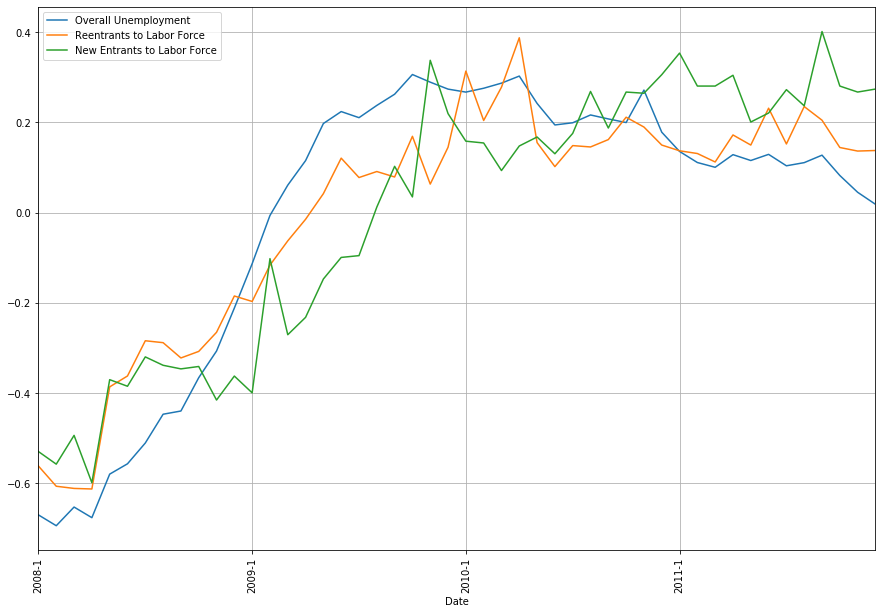

In [160]:
changewf_norm.plot(x='Date', figsize=(15, 10))
plt.grid()
plt.xlabel('Date')
ticks = changewf_norm['Date'][::12].to_numpy()
idxs = changewf_norm['Date'][::12].index
plt.xticks(idxs, ticks, rotation='vertical')

plt.show()

In [ ]:
# Add to plots notebook

In [126]:
# changein_unemployment = []
# changein_reentrants = []
# changein_newentrants = []
# changein_dates = []

# unemploy_change = 0
# unemploy_changetwo = 0
# reentry_change = 0
# reentry_changetwo = 0
# newentry_change = 0
# newentry_changetwo = 0

# for index, row in newworkforce.iterrows():
#     unemploy_change = row['Overall Unemployment']
#     reentry_change = row['Reentrants to Labor Force']
#     newentry_change = row['New Entrants to Labor Force']
#     changein_unemployment.append(unemploy_change - unemploy_changetwo)
#     changein_reentrants.append(reentry_change - reentry_changetwo)
#     changein_newentrants.append(newentry_change - newentry_changetwo)
#     changein_dates.append(row['Date'])
#     unemploy_changetwo = row['Overall Unemployment']
#     reentry_changetwo = row['Reentrants to Labor Force']
#     newentry_changetwo = row['New Entrants to Labor Force']


# change_df= pd.DataFrame({'Date': changein_dates, 'Change in Total Unemployment': changein_unemployment, 
#                          'Change in Reentrants': changein_reentrants, 'Change in New Entrants': changein_newentrants})

# change_df = change_df.drop(0, axis=0)
# change_df.head(10)

In [127]:
# change_df_data = change_df[['Change in Total Unemployment', 'Change in Reentrants', 'Change in New Entrants']]
# change_df_date = change_df['Date']
# change_norm = (change_df_data - change_df_data.mean()) / (change_df_data.max() - change_df_data.min())
# change_norm['Date'] = change_df_date
# change_norm = change_norm[['Date', 'Change in Total Unemployment', 'Change in Reentrants', 'Change in New Entrants']]

In [128]:
# change_norm.plot(figsize=(17, 12))
# plt.grid()
# plt.xticks('10':'2008', '20':'2009', '30':'2010', '40':'2011')